In [1]:
#Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from datetime import datetime 

# Data Understanding

In [2]:
#Load data file without customerID
df = pd.read_csv('input/train.csv', sep=",", nrows=100000)

C:\Users\Marco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77,8,SW


In [4]:
df.tail()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
99995,2017102205,20171022053443,away,48.59,31.15,0.76,1.28,0.07,168.28,163.30,...,7,Twickenham,London,Outdoor,Grass,Rain,54.0,72,10,W
99996,2017102205,20171022053443,away,55.63,40.76,2.63,2.62,0.45,178.13,38.16,...,7,Twickenham,London,Outdoor,Grass,Rain,54.0,72,10,W
99997,2017102205,20171022053443,away,47.92,26.82,2.62,1.03,0.34,255.70,345.74,...,7,Twickenham,London,Outdoor,Grass,Rain,54.0,72,10,W
99998,2017102205,20171022053443,away,54.68,23.63,1.50,0.95,0.19,197.59,84.68,...,7,Twickenham,London,Outdoor,Grass,Rain,54.0,72,10,W
99999,2017102205,20171022053443,away,49.36,29.97,0.37,0.40,0.07,192.77,122.53,...,7,Twickenham,London,Outdoor,Grass,Rain,54.0,72,10,W


In [5]:
df.columns.values

array(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis',
       'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber',
       'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam',
       'Down', 'Distance', 'FieldPosition', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation',
       'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel',
       'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards',
       'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf',
       'GameWeather', 'Temperature', 'Humidity', 'WindSpeed',
       'WindDirection'], dtype=object)

In [6]:
df.shape

(100000, 49)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  100000 non-null  int64  
 1   PlayId                  100000 non-null  int64  
 2   Team                    100000 non-null  object 
 3   X                       100000 non-null  float64
 4   Y                       100000 non-null  float64
 5   S                       100000 non-null  float64
 6   A                       100000 non-null  float64
 7   Dis                     100000 non-null  float64
 8   Orientation             100000 non-null  float64
 9   Dir                     100000 non-null  float64
 10  NflId                   100000 non-null  int64  
 11  DisplayName             100000 non-null  object 
 12  JerseyNumber            100000 non-null  int64  
 13  Season                  100000 non-null  int64  
 14  YardLine             

In [8]:
df.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,...,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,88538.000000,100000.000000
mean,2.017097e+09,2.017097e+13,60.115713,26.775769,2.471593,1.612124,0.284456,181.096975,179.902818,2.287553e+06,...,8.44944,10.677660,9.319860,2.330504e+06,7.007260,4.083500,254.478650,3.728380,73.901579,52.708860
std,4.662626e+03,4.662627e+07,25.407727,7.222760,1.306284,0.883266,0.146576,109.705308,106.642697,7.179166e+05,...,3.82694,10.196609,9.132585,6.881022e+05,0.989089,6.601446,48.029887,1.853806,9.357358,25.634736
min,2.017091e+09,2.017091e+13,4.490000,2.690000,0.000000,0.000000,0.000000,0.000000,0.000000,2.340000e+02,...,1.00000,0.000000,0.000000,2.340000e+02,3.000000,-10.000000,158.000000,1.000000,52.000000,0.000000
25%,2.017092e+09,2.017092e+13,38.920000,22.740000,1.430000,0.920000,0.170000,95.457500,90.407500,2.507617e+06,...,6.00000,2.000000,0.000000,2.533034e+06,6.000000,1.000000,211.000000,2.000000,68.000000,43.000000
50%,2.017100e+09,2.017100e+13,60.480000,26.820000,2.360000,1.500000,0.280000,179.820000,180.140000,2.541958e+06,...,10.00000,9.000000,7.000000,2.550658e+06,7.000000,3.000000,247.000000,4.000000,72.000000,56.000000
75%,2.017101e+09,2.017101e+13,81.400000,30.860000,3.412500,2.220000,0.400000,274.892500,269.590000,2.553560e+06,...,10.00000,17.000000,16.000000,2.555464e+06,8.000000,6.000000,305.000000,5.000000,83.000000,70.000000
max,2.017102e+09,2.017102e+13,116.030000,49.130000,8.940000,6.580000,1.390000,359.990000,360.000000,2.559368e+06,...,40.00000,57.000000,42.000000,2.559169e+06,11.000000,90.000000,380.000000,7.000000,91.000000,100.000000


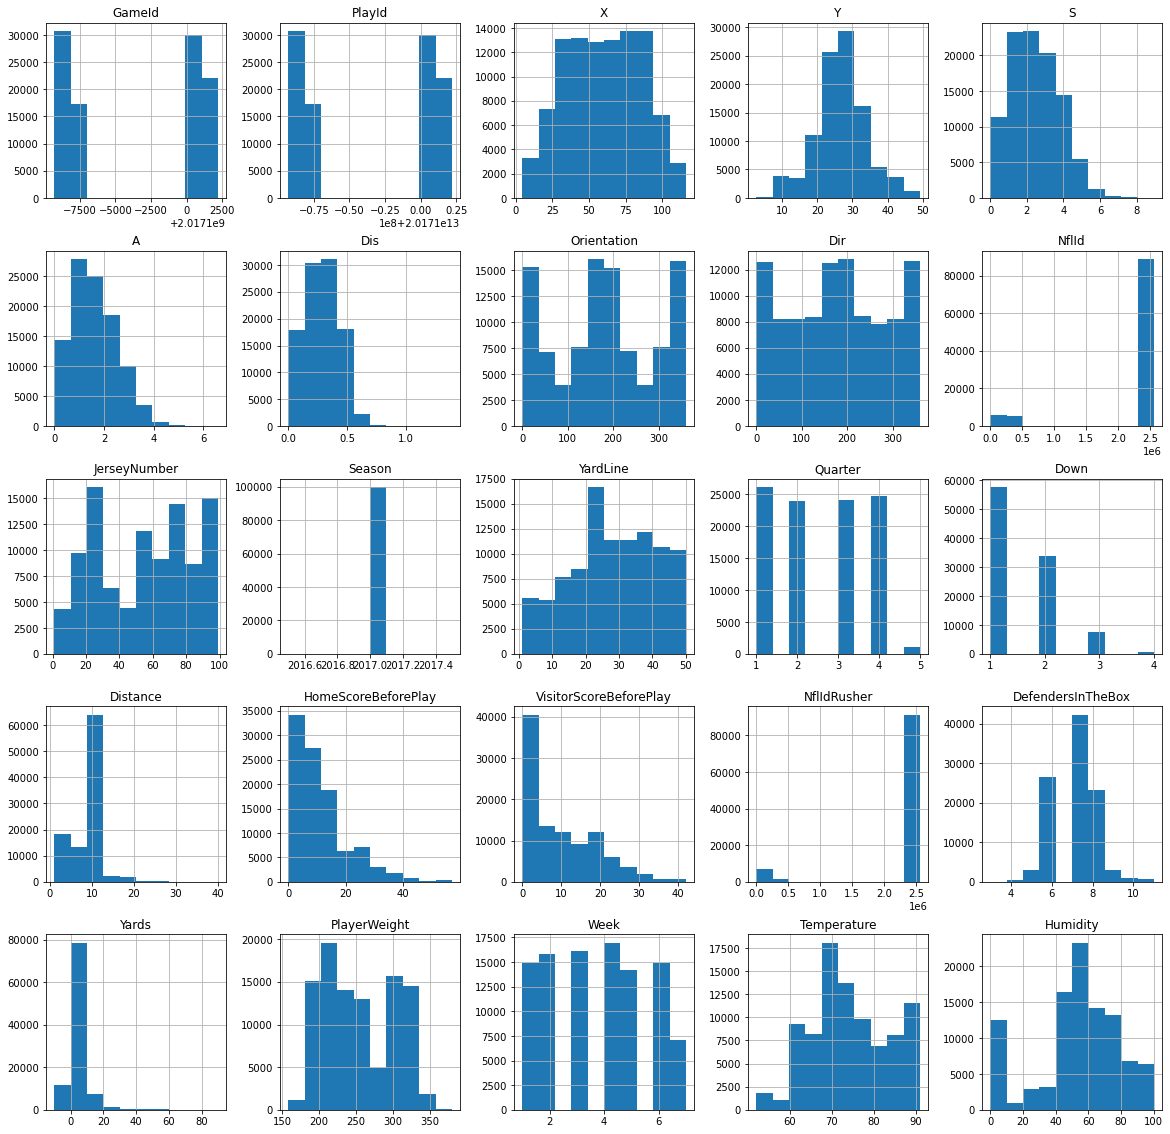

In [9]:
plot = df.hist(figsize = (20,20))

In [10]:
df.isnull().sum()

GameId                        0
PlayId                        0
Team                          0
X                             0
Y                             0
S                             0
A                             0
Dis                           0
Orientation                   0
Dir                           0
NflId                         0
DisplayName                   0
JerseyNumber                  0
Season                        0
YardLine                      0
Quarter                       0
GameClock                     0
PossessionTeam                0
Down                          0
Distance                      0
FieldPosition              1298
HomeScoreBeforePlay           0
VisitorScoreBeforePlay        0
NflIdRusher                   0
OffenseFormation             22
OffensePersonnel              0
DefendersInTheBox             0
DefensePersonnel              0
PlayDirection                 0
TimeHandoff                   0
TimeSnap                      0
Yards   

In [11]:
Y = df["Yards"].values
X = df[['Quarter', 'Down', 'Distance', 'X', 'Y']]

In [12]:
#Skalieren der Daten
scaler = StandardScaler()

In [13]:
X[['Distance', 'X','Y' ]] = scaler.fit_transform(X[['Distance', 'X','Y' ]])

<ipython-input-13-6efcbcaf8ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Distance', 'X','Y' ]] = scaler.fit_transform(X[['Distance', 'X','Y' ]])
C:\Users\Marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [14]:
X

,Quarter,Down,Distance,X,Y
0,1,3,-1.685282,0.542920,1.116508
1,1,3,-1.685282,0.572832,0.811914
2,1,3,-1.685282,0.546462,0.889447
3,1,3,-1.685282,0.446492,0.127962
4,1,3,-1.685282,0.362265,1.196810
...,...,...,...,...,...
99995,4,2,0.405172,-0.453633,0.605621
99996,4,2,0.405172,-0.176550,1.936144
99997,4,2,0.405172,-0.480003,0.006124
99998,4,2,0.405172,-0.213940,-0.435538


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
clf = RandomForestRegressor()

In [17]:
clf.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_pred

array([6.35, 1.72, 9.3 , ..., 3.53, 3.13, 2.11])

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

41.56140614368855